<a href="https://colab.research.google.com/github/JihyeLimm/Quest/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project1
1. 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [66]:
#데이터 다운로드
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


diabetes = load_diabetes()

df_x = diabetes.data
df_y = diabetes.target

print(type(df_x), df_x.shape)

#train /test data 분리
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


#모델준비하기 
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#손실함수loss정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


#기울기 함수 구현
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



<class 'numpy.ndarray'> (442, 10)
(353, 10) (353,)
(89, 10) (89,)


In [71]:
#하이퍼파라미터 학습률 설정
LEARNING_RATE = 0.5

#모델 학습
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 500 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


#테스트 데이터 성능 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse   #3000이하

Iteration 500 : Loss 2894.4867
Iteration 1000 : Loss 2893.9473
Iteration 1500 : Loss 2893.4198
Iteration 2000 : Loss 2892.9037


2885.4600405694155

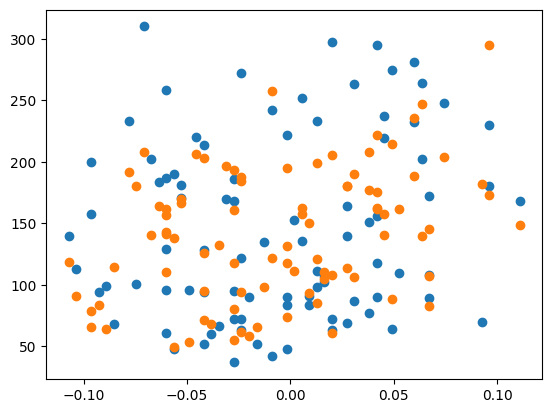

In [72]:
#정답데이터와 예측한 데이터 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

2. 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량 예측
>https://www.kaggle.com/competitions/bike-sharing-demand/code

In [75]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount = True)
os.chdir("/gdrive/MyDrive/AIFFEL/230517")
os.getcwd()

train = pd.read_csv('/gdrive/MyDrive/AIFFEL/230517/train.csv')
print(train.shape)  #(10886, 12)
train.head(2)

Mounted at /gdrive
(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [76]:
#date컬럼 자료형 변환
train["datetime"] = pd.to_datetime(train["datetime"])

#연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성
train['year']=train[ "datetime"].dt.year
train['month']=train[ "datetime"].dt.month
train['day']=train[ "datetime"].dt.day
train['hr']=train[ "datetime"].dt.hour
train['min']=train[ "datetime"].dt.minute
train['sec']=train[ "datetime"].dt.second
train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hr,min,sec
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


<Axes: xlabel='sec', ylabel='count'>

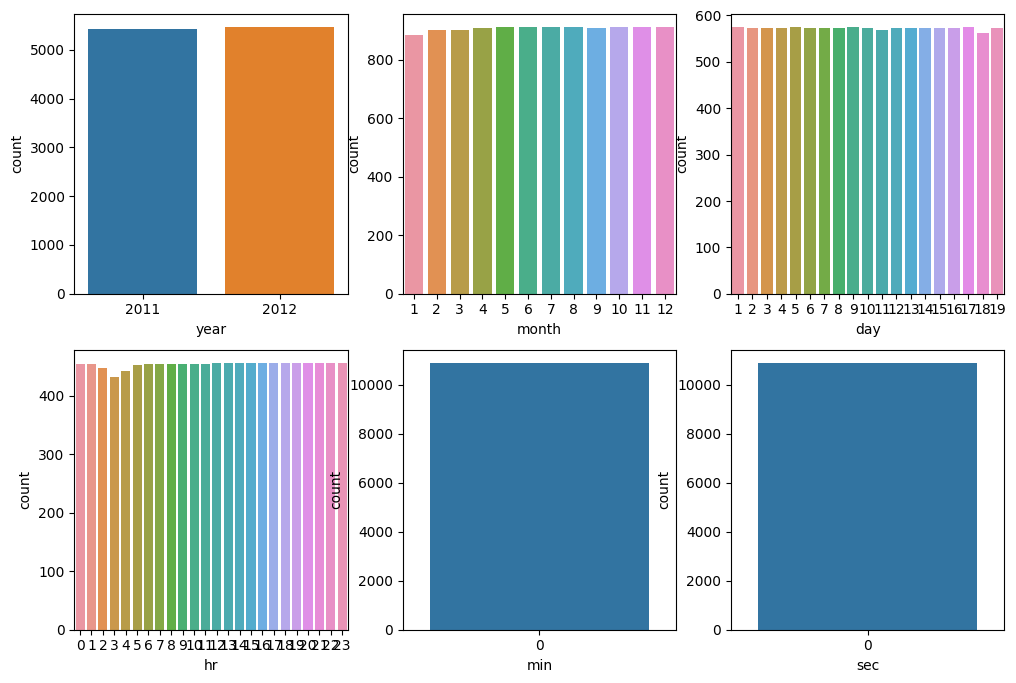

In [77]:
#year, month, day, hour, minute, second 데이터 개수 시각화
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
#plt.title('year')
sns.countplot(x = "year", data = train)

plt.subplot(2,3,2)
#plt.title('month')
sns.countplot(x = "month", data = train)

plt.subplot(2,3,3)
#plt.title('day')
sns.countplot(x = "day", data = train)

plt.subplot(2,3,4)
#plt.title('hour')
sns.countplot(x = "hr", data = train)

plt.subplot(2,3,5)
#plt.title('minute')
sns.countplot(x = "min", data = train)

plt.subplot(2,3,6)
#plt.title('second')
sns.countplot(x = "sec", data = train)

In [78]:
#컬럼선택

train = train[["season", "holiday", "workingday", "weather", "temp", "atemp",	"humidity", "windspeed", "count", "hr"]]
train.head(3)
X = train[["season", "holiday", "workingday", "weather", "temp", "atemp",	"humidity", "windspeed", "hr"]].values
y = train[["count"]].values


print(type(X), X.shape)  #(10886, 8)

#train /test data 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape) #(8708, 8) (8708, 1)
print(X_test.shape, y_test.shape)   #(2178, 8) (2178, 1)


<class 'numpy.ndarray'> (10886, 9)
(8708, 9) (8708, 1)
(2178, 9) (2178, 1)


In [79]:
#LinearRegresson 모델학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#학습된 모델로 x_test에 대한 예측값 출력
predictions = model.predict(X_test)
len(predictions)
#predictions

2178

In [83]:
#손실함수 값 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mse)
print(mse)
print(RMSE)  #150이하 나와야함 

21723.95125263217
147.3904720551236


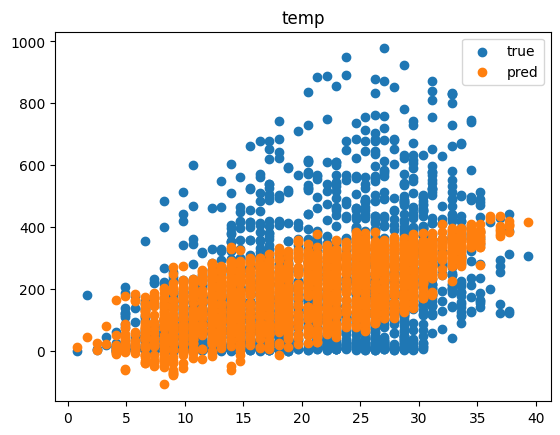

In [85]:
#x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.title("temp")
plt.legend()
plt.show()

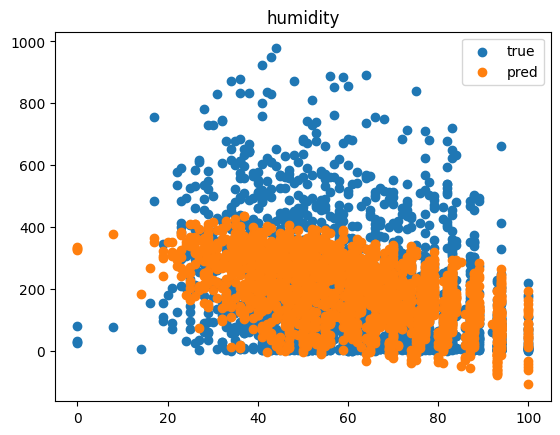

In [86]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.title("humidity")
plt.legend()
plt.show()